In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Telco-Customer-Churn.csv")

In [373]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [375]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")

In [377]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [381]:
df.isnull().sum().sum()

0

In [383]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [385]:
df.duplicated().sum()

0

In [387]:
df["customerID"].duplicated().sum()

0

In [389]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
        
df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)       

In [391]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#converted 0&1 values of senior citizen to yes/no 

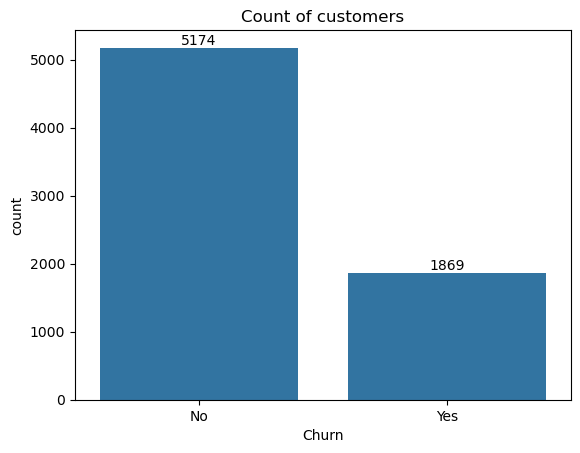

In [394]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers")
plt.show()

#convert stringtofloat

In [396]:
gb=df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


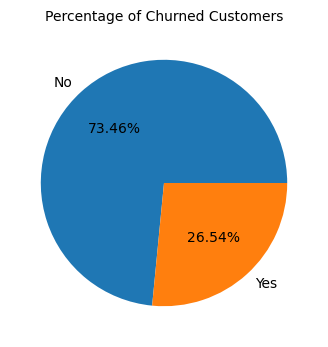

In [398]:
plt.figure(figsize=(4,4))
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

#from given piechart we can conclude 26.54% of our customers have churned out
lets explore the reason

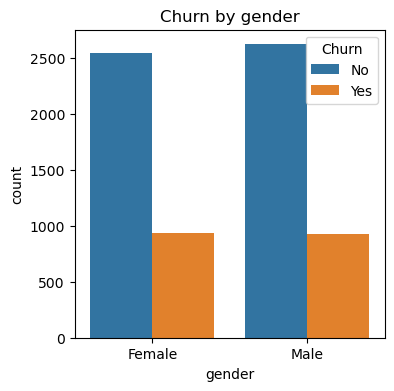

In [401]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender',data=df,hue="Churn")
plt.title("Churn by gender")
plt.show()

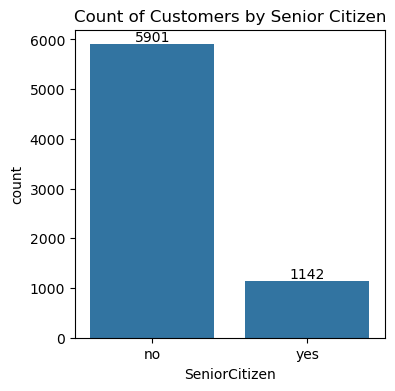

In [403]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen',data=df,hue="Churn")
plt.title("Churn by Senior Citizen")
plt.show()

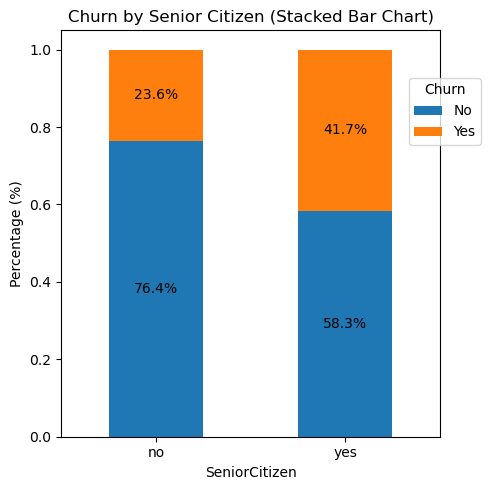

In [405]:


# Correct grouping and normalization
totalcount = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
totalcount.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Annotate percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height * 100:.1f}%', ha='center', va='center')

# Labels and title
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(0.9,0.9))
plt.tight_layout()
plt.show()


#comparative a greater percentage of people in senior citizen category have churned

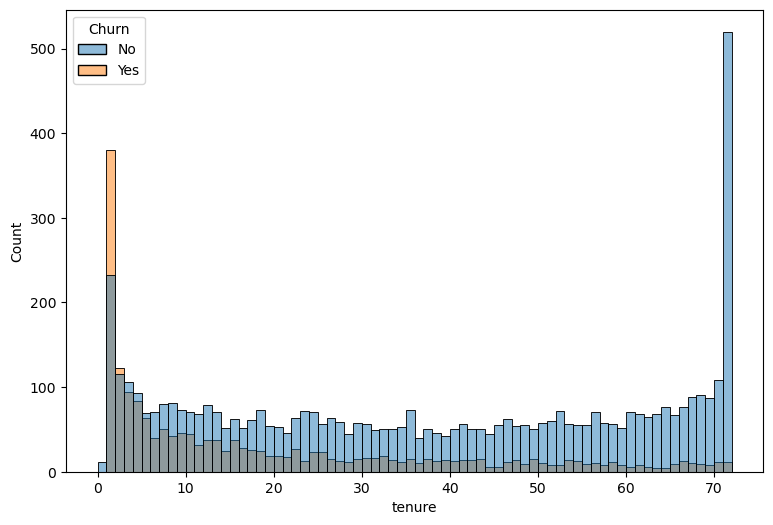

In [407]:
plt.figure(figsize=(9,6))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months

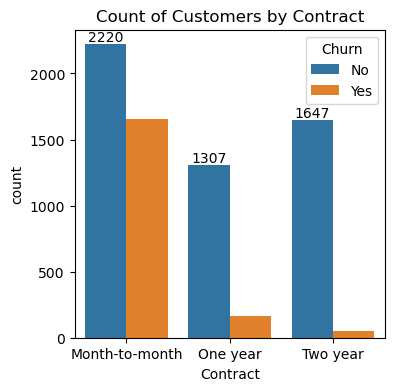

In [410]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

people who have month-to-month are likely to churn from those who have yearly contracts

In [412]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [414]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Calculate grid dimensions
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create subplots
plt.figure(figsize=(18, 4*n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    # Updated countplot syntax to avoid FutureWarning
    sns.countplot(data=df, x=col, hue=df['Churn'], legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel('')  # Remove x-label as it's redundant with the title
    
    # Add count labels on top of each bar
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   fontsize=9)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Distribution of Categorical Variables', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

NameError: name 'math' is not defined

Summary


The data shows varying levels of service adoption across different customer segments, with contract type likely being a significant factor in customer retention. Monthly charges and tenure information suggest a diverse customer base with different spending patterns and loyalty levels.

In [ ]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

customer is likely to churn when he is using electric check as a payment method

In [ ]:
Model Building

In [448]:

df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_6344\2915236844.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [452]:
objects_columns = df.select_dtypes(include = "object").columns

In [454]:
objects_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [456]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [458]:
encoders


{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [462]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [464]:
from sklearn.preprocessing import StandardScaler

In [466]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [468]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [470]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [471]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [472]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [479]:
y_train.value_counts()


Churn
0    4138
1    1496
Name: count, dtype: int64

In [481]:
smote = SMOTE(random_state = 42)

In [483]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [485]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [487]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [489]:
hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

In [491]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': None, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.84

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy for XGBoost :  0.82



In [492]:
best_models

{'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)}

In [493]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [494]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [495]:
y_test_pred = best_models['Random Forest'].predict(X_test)
y_test_prob = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [496]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [497]:
y_test_prob

array([0.905, 0.41 , 0.025, ..., 0.015, 0.025, 0.385])

In [521]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred))

Accuracy :  0.7792760823278921
ROC - AUC Score :  0.7435291956069436
Confusion Matrix : 
 [[849 187]
 [124 249]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.67      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [523]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data =pickle.load(f)

In [525]:
def make_prediction(input_data):
    # Drop customerID if present
    input_data.pop('customerID', None)
    
    input_df = pd.DataFrame([input_data])
    
    # Encode categorical features
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    
    # Scale numerical features
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    
    # Predict
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    
    return "Churn" if prediction == 1 else "No Churn", probability


In [533]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [541]:
for col, encoder in encoders.items():
    print(col, encoder.classes_)


gender ['Female' 'Male']
SeniorCitizen ['no' 'yes']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'No phone service' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'No internet service' 'Yes']
OnlineBackup ['No' 'No internet service' 'Yes']
DeviceProtection ['No' 'No internet service' 'Yes']
TechSupport ['No' 'No internet service' 'Yes']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [543]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 'no',
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


In [547]:
prediction, prob = make_prediction(example_input)
prediction

'No Churn'

In [549]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: No Churn, Probability :  0.24
